**IMPORTING LIBRARIES**

In [ ]:
from tensorflow.keras import layers,models,regularizers
from tensorflow.keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.model_selection import train_test_split

**INSTALLING KAGGEL**

In [ ]:
!pip install -q kaggle

**LOADING DATASET**

In [ ]:
! mkdir ~/.kaggle
! cp /content/drive/MyDrive/Adaovi/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mohamedhanyyy/chest-ctscan-images
!unzip chest-ctscan-images.zip

Dataset URL: https://www.kaggle.com/datasets/mohamedhanyyy/chest-ctscan-images
License(s): ODbL-1.0
 89% 105M/119M [00:01<00:00, 76.1MB/s]
100% 119M/119M [00:01<00:00, 92.9MB/s]
Archive:  chest-ctscan-images.zip
  inflating: Data/test/adenocarcinoma/000108 (3).png  
  inflating: Data/test/adenocarcinoma/000109 (2).png  
  inflating: Data/test/adenocarcinoma/000109 (4).png  
  inflating: Data/test/adenocarcinoma/000109 (5).png  
  inflating: Data/test/adenocarcinoma/000112 (2).png  
  inflating: Data/test/adenocarcinoma/000113 (7).png  
  inflating: Data/test/adenocarcinoma/000114 (5).png  
  inflating: Data/test/adenocarcinoma/000114.png  
  inflating: Data/test/adenocarcinoma/000115 (4).png  
  inflating: Data/test/adenocarcinoma/000115 (8).png  
  inflating: Data/test/adenocarcinoma/000115.png  
  inflating: Data/test/adenocarcinoma/000116 (5).png  
  inflating: Data/test/adenocarcinoma/000116 (7).png  
  inflating: Data/test/adenocarcinoma/000116 (9).png  
  inflating: Data/test/ade

**LOADING IMAGES**

In [ ]:
def load_images(image_paths, target_size=(256, 256)):
    images = []
    labels = []
    for label, path in enumerate(image_paths):
        image_files = os.listdir(path)
        for file in image_files:
            img_path = os.path.join(path, file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, target_size)
                images.append(img)
                labels.append(label)
    train = np.array(images)
    train_labels = np.array(labels)
    return train, train_labels


**LOADING TRAIN IMAGES**

In [ ]:
image_paths = [
    '/content/Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa',
    '/content/Data/train/normal',
    '/content/Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
    '/content/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'
]

train, train_labels = load_images(image_paths)
train = train.reshape(613,256,256,3).astype('float32') / 255.0
train_labels = to_categorical(train_labels)

In [ ]:
train, val, train_labels, val_labels = train_test_split(train, train_labels, test_size=0.2, random_state=42)
print("Training data shape:", train.shape)
print("Validation data shape:", val.shape)
print("Training labels shape:", train_labels.shape)
print("Validation labels shape:", val_labels.shape)

Training data shape: (490, 256, 256, 3)
Validation data shape: (123, 256, 256, 3)
Training labels shape: (490, 4)
Validation labels shape: (123, 4)


In [ ]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(train)

**VISUALISING IMAGES**

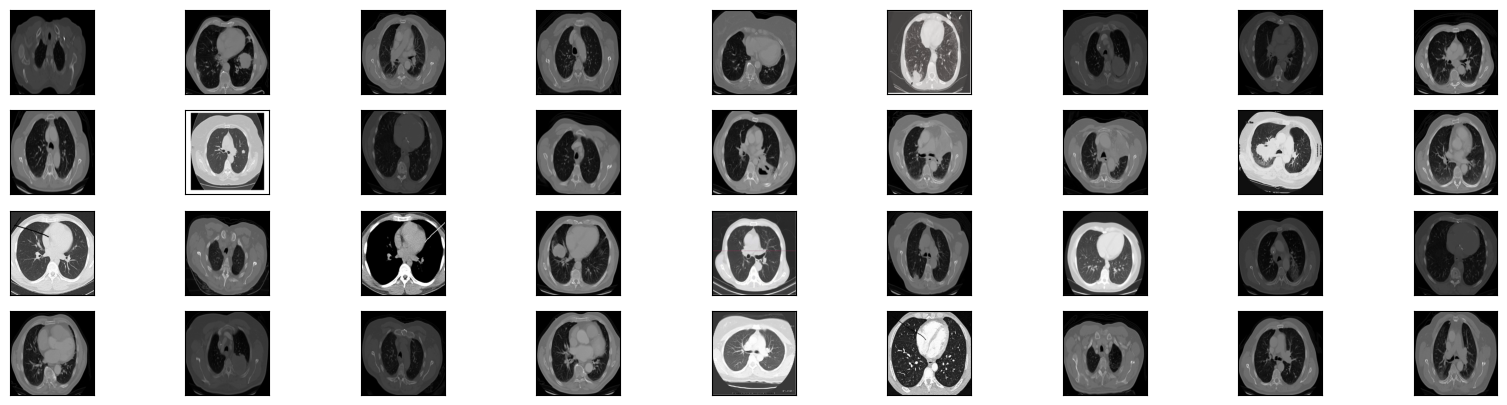

In [ ]:
fig = plt.figure(figsize=(20, 5))
for i in range(min(36, len(train))):
    ax = fig.add_subplot(4, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(train[i])

**NEURAL NETWORK**

**Building Model**

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')
])

**Plotting the model**

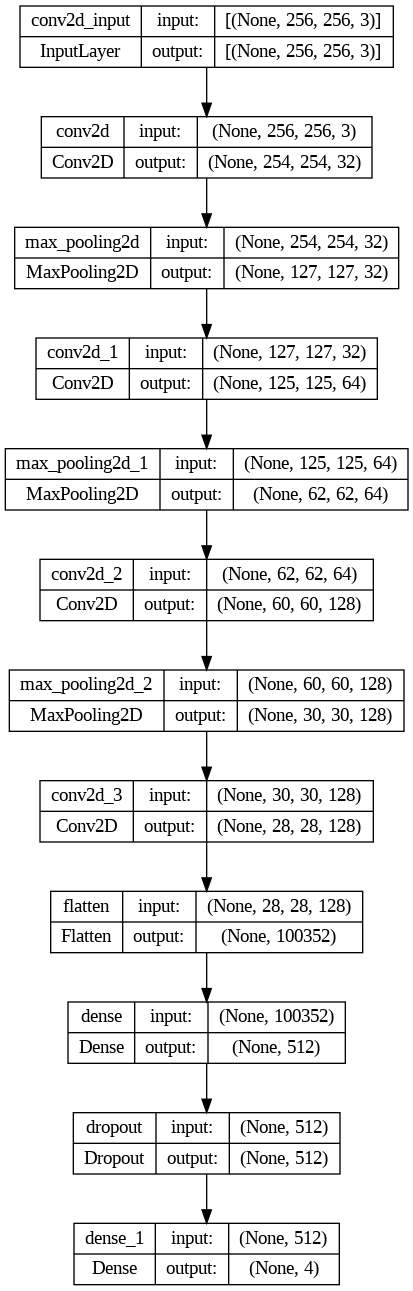

In [ ]:
plot_model(model,show_shapes=True,show_layer_names=True)

**Model fiting**

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
history=model.fit(train,train_labels,epochs=15,batch_size=64,validation_split=0.2)

Epoch 1/15
7/7 [==============================] - 82s 11s/step - loss: 0.1669 - accuracy: 0.9286 - val_loss: 0.4636 - val_accuracy: 0.8673
Epoch 2/15
7/7 [==============================] - 68s 9s/step - loss: 0.1127 - accuracy: 0.9643 - val_loss: 0.3510 - val_accuracy: 0.8980
Epoch 3/15
7/7 [==============================] - 67s 10s/step - loss: 0.0740 - accuracy: 0.9796 - val_loss: 0.3496 - val_accuracy: 0.8673
Epoch 4/15
7/7 [==============================] - 67s 9s/step - loss: 0.1008 - accuracy: 0.9770 - val_loss: 0.7879 - val_accuracy: 0.8163
Epoch 5/15
7/7 [==============================] - 70s 10s/step - loss: 0.0676 - accuracy: 0.9847 - val_loss: 0.3755 - val_accuracy: 0.8980
Epoch 6/15
7/7 [==============================] - 67s 9s/step - loss: 0.0624 - accuracy: 0.9821 - val_loss: 0.4927 - val_accuracy: 0.8776
Epoch 7/15
7/7 [==============================] - 67s 10s/step - loss: 0.0819 - accuracy: 0.9821 - val_loss: 0.4539 - val_accuracy: 0.9082
Epoch 8/15
7/7 [==============

**LOADING TEST DATA**

In [29]:
image_paths = ['/content/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa',
    '/content/Data/valid/normal',
    '/content/Data/valid/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa',
               '/content/Data/valid/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib'
]

test, test_labels = load_images(image_paths)
test = test.reshape(72,256,256,3).astype('float32') / 255.0
test_labels = to_categorical(test_labels)

**Model Evaluation**

In [30]:
test_loss,test_acc=model.evaluate(test,test_labels)
print(f'Test accuracy {test_acc}')

3/3 [==============================] - 3s 771ms/step - loss: 1.6416 - accuracy: 0.8056
Test accuracy 0.8055555820465088


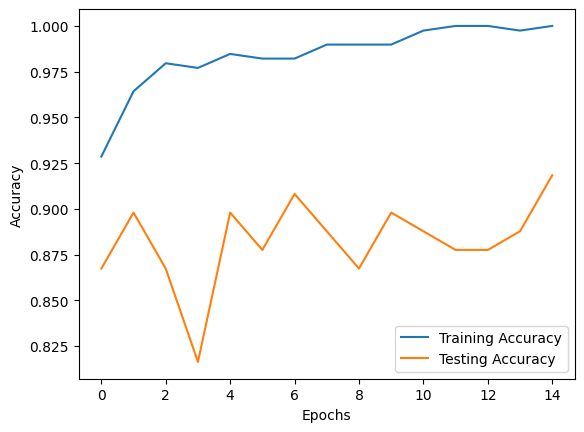

In [31]:
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**MODEL PREDICTION**

In [32]:
(test,test_labels)=load_images(image_paths)
test=test.astype('float32')/255
test_labels=to_categorical(test_labels)

In [33]:
predictions=model.predict(test)

3/3 [==============================] - 3s 762ms/step


In [34]:
prediction_classes=np.argmax(predictions,axis=1)
class_labels=["squamous.cell.carcinoma","normal","large.cell.carcinoma","adenocarcinoma"]
predicted_labels=[class_labels[i] for i in prediction_classes]

1/1 [==============================] - 0s 78ms/step


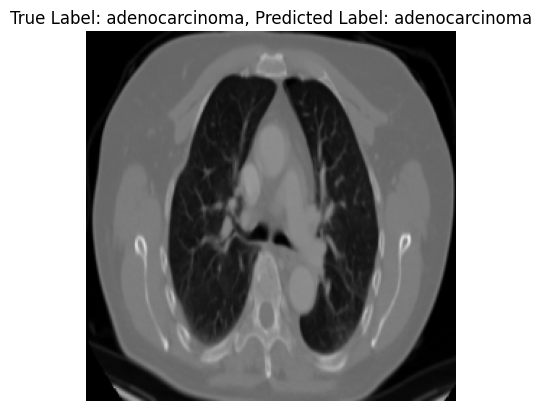

In [35]:
(test,test_labels)=load_images(image_paths)
test=test.astype('float32')/255
test_labels=to_categorical(test_labels)
index=60
image_to_predict = np.expand_dims(test[index], axis=0)
true_label = np.argmax(test_labels[index])
predictions = model.predict(image_to_predict)
prediction_classes = np.argmax(predictions)
plt.imshow(test[index])
plt.title(f"True Label: {class_labels[true_label]}, Predicted Label: {class_labels[prediction_classes]}")
plt.axis('off')
plt.show()

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = model.predict(test)
prediction_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_labels, axis=1)
print(classification_report(true_classes, prediction_classes, target_names=class_labels))
conf_matrix = confusion_matrix(true_classes, prediction_classes)
print(conf_matrix)


3/3 [==============================] - 3s 768ms/step
                         precision    recall  f1-score   support

squamous.cell.carcinoma       0.68      0.87      0.76        15
                 normal       1.00      0.92      0.96        13
   large.cell.carcinoma       0.89      0.76      0.82        21
         adenocarcinoma       0.74      0.74      0.74        23

               accuracy                           0.81        72
              macro avg       0.83      0.82      0.82        72
           weighted avg       0.82      0.81      0.81        72

[[13  0  0  2]
 [ 0 12  1  0]
 [ 1  0 16  4]
 [ 5  0  1 17]]
